## Load Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans #imports Kmean algorithm from the sklearn's cluster library
from sklearn import metrics #imports metrics from sklearn library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_excel('Sample_data.xlsx',  encoding='latin1')
df.set_index('Customer ID', inplace=True)
print(df.shape)
df.head()

(100, 473)


,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,157,88,379.0,230.070,103,62,207.0,128.794,51,31,...,0,0,0,0,0,0,0,0,45,3
2,41,38,132.5,137.276,17,14,65.0,77.824,23,23,...,0,0,0,0,25.523,1,0,0,60,4
3,321,185,274.5,98.422,249,150,204.0,49.151,69,44,...,0,0,0,0,0,0,0,0,0,0
4,11,6,172.5,7.587,1,1,2.0,0.149,10,6,...,0,0,0,0,0,0,0,0,0,0
5,313,220,2888.0,52.915,170,131,791.0,29.699,132,100,...,0,0,0,0,0,0,0,0,15,1


In [3]:
df.dropna()
df.head()

,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,157,88,379.0,230.070,103,62,207.0,128.794,51,31,...,0,0,0,0,0,0,0,0,45,3
2,41,38,132.5,137.276,17,14,65.0,77.824,23,23,...,0,0,0,0,25.523,1,0,0,60,4
3,321,185,274.5,98.422,249,150,204.0,49.151,69,44,...,0,0,0,0,0,0,0,0,0,0
4,11,6,172.5,7.587,1,1,2.0,0.149,10,6,...,0,0,0,0,0,0,0,0,0,0
5,313,220,2888.0,52.915,170,131,791.0,29.699,132,100,...,0,0,0,0,0,0,0,0,15,1


In [61]:
df = df.loc[:,(df!=0).any(axis=0)]
df.head()

,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,157,88,379.0,230.070,103,62,207.0,128.794,51,31,...,0,0,0,0,0,0,0,0,45,3
2,41,38,132.5,137.276,17,14,65.0,77.824,23,23,...,0,0,0,0,25.523,1,0,0,60,4
3,321,185,274.5,98.422,249,150,204.0,49.151,69,44,...,0,0,0,0,0,0,0,0,0,0
4,11,6,172.5,7.587,1,1,2.0,0.149,10,6,...,0,0,0,0,0,0,0,0,0,0
5,313,220,2888.0,52.915,170,131,791.0,29.699,132,100,...,0,0,0,0,0,0,0,0,15,1


In [4]:
df.describe()

,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,...,U_IB_OFNT_OFFPEAK_SMS_CNT_T6,U_IB_OFNT_H_SMS_CNT_T6,U_IB_OFNT_W_SMS_CNT_T6,U_IB_OFNT_LND_SMS_CNT_T6,U_IB_OFNT_MOBIL_SMS_CNT_T6,U_IB_OFNT_MBLNK_SMS_CNT_T6,U_IB_OFNT_UFN_SMS_CNT_T6,U_IB_OFNT_WRD_SMS_CNT_T6,U_IB_OFNT_ZNG_SMS_CNT_T6,U_IB_OFNT_INT_SMS_CNT_T6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,202.050000,111.830000,691.360000,140.117620,111.620000,69.980000,330.685000,69.930840,73.550000,48.260000,...,54.110000,25.560000,45.960000,8.170000,70.93000,27.310000,5.610000,6.550000,31.4600,0.090000
std,184.225837,97.871804,737.074305,268.021288,108.529173,65.794596,356.864875,124.936672,67.557888,44.101724,...,193.261057,98.438241,163.640831,9.508162,259.30374,102.457944,20.500256,28.629072,151.2473,0.404395
min,2.000000,1.000000,103.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,72.000000,38.750000,170.625000,39.804500,34.500000,23.500000,102.625000,19.229250,19.250000,14.750000,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,141.500000,79.500000,404.750000,90.279500,74.500000,45.500000,218.000000,43.145500,52.000000,35.000000,...,2.000000,1.000000,1.000000,6.000000,2.00000,1.000000,0.000000,0.000000,0.0000,0.000000
75%,304.750000,159.750000,928.500000,167.915750,154.500000,98.250000,427.625000,81.055500,114.000000,69.750000,...,20.750000,10.500000,18.250000,10.000000,29.25000,10.250000,1.000000,0.000000,1.2500,0.000000
max,945.000000,400.000000,4049.000000,2570.612000,558.000000,292.000000,2185.000000,1178.275000,311.000000,173.000000,...,1563.000000,807.000000,1291.000000,56.000000,2075.00000,873.000000,146.000000,221.000000,1092.0000,3.000000


In [62]:
df_interested = df[['U_OB_VC_CNT_T6','U_OB_SMS_CNT_T6','RECH_AMT_T6','U_GPRS_VOL_T6']]
df_interested.head(5)

,U_OB_VC_CNT_T6,U_OB_SMS_CNT_T6,RECH_AMT_T6,U_GPRS_VOL_T6
Customer ID,,,,
1,157,0,600,0
2,41,586,400,1316
3,321,2,800,61
4,11,0,90,0
5,313,189,600,0


## 1. Removed collinear variables

Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables.

We do have a very large ammount of independent variables. adding irrelevant variables will degrade the performance of the models.

In [13]:
corr = df.corr().abs()

In [14]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [17]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [25]:
df_temp = df.drop(columns=to_drop, axis=1)

In [26]:
df_temp.head()

,U_OB_VC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_NGT_VC_CNT_T6,U_OB_NGT_VC_DUR_T6,U_OB_PAID_VC_CNT_T6,U_OB_FREE_VC_CNT_T6,U_OB_FNF_VC_CNT_T6,U_OB_FNF_VC_CC_CNT_T6,U_OB_FNF_VC_DUR_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,157,379.0,230.070,3,3.0,157,0,12,9,13.0,...,0,0,0,0,0,0,0,0,45,3
2,41,132.5,137.276,1,1.0,41,0,9,8,59.0,...,0,0,0,0,25.523,1,0,0,60,4
3,321,274.5,98.422,3,1.5,321,0,70,34,64.0,...,0,0,0,0,0,0,0,0,0,0
4,11,172.5,7.587,0,0.0,11,0,3,2,93.5,...,0,0,0,0,0,0,0,0,0,0
5,313,2888.0,52.915,11,95.0,311,2,17,11,205.0,...,0,0,0,0,0,0,0,0,15,1


**Scaling**

In [28]:
df_numericals =  df_temp._get_numeric_data()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
df_new = scaler.fit_transform(df_numericals)
scaled = pd.DataFrame(columns =list(df_numericals.columns), data=df_new)
df_numericals['Customer ID'] = df_temp.index

scaled.head()

,U_OB_VC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_NGT_VC_CNT_T6,U_OB_NGT_VC_DUR_T6,U_OB_PAID_VC_CNT_T6,U_OB_FREE_VC_CNT_T6,U_OB_FNF_VC_CNT_T6,U_OB_FNF_VC_CC_CNT_T6,U_OB_FNF_VC_DUR_T6,...,U_IB_OFNT_WRD_VC_DUR_T6,U_IB_OFNT_ZNG_VC_CNT_T6,U_IB_OFNT_ZNG_VC_DUR_T6,U_IB_SMS_CC_CNT_T6,U_IB_OFNT_SMS_CC_CNT_T6,U_IB_OFNT_NGT_SMS_CNT_T6,U_IB_OFNT_LND_SMS_CNT_T6,U_IB_OFNT_UFN_SMS_CNT_T6,U_IB_OFNT_WRD_SMS_CNT_T6,U_IB_OFNT_INT_SMS_CNT_T6
0,0.164369,0.069944,0.089500,0.022727,0.004093,0.166138,0.000000,0.052402,0.083333,0.007874,...,0.011765,0.000000,0.000000,0.300000,0.200000,0.000000,0.535714,0.000000,0.000000,0.0
1,0.041357,0.007476,0.053402,0.007576,0.001364,0.043386,0.000000,0.039301,0.074074,0.035736,...,0.141176,0.000000,0.000000,1.000000,0.966667,0.101852,0.196429,0.308219,0.574661,0.0
2,0.338282,0.043462,0.038287,0.022727,0.002046,0.339683,0.000000,0.305677,0.314815,0.038764,...,0.011765,0.000000,0.000000,0.233333,0.000000,0.000000,0.089286,0.000000,0.000000,0.0
3,0.009544,0.017613,0.002951,0.000000,0.000000,0.011640,0.000000,0.013100,0.018519,0.056632,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.071429,0.000000,0.000000,0.0
4,0.329799,0.705778,0.020585,0.083333,0.129604,0.329101,0.002941,0.074236,0.101852,0.124167,...,0.000000,0.419355,0.350877,0.933333,0.866667,0.212963,0.303571,0.102740,0.000000,0.0


In [42]:
scaled_data = scaled.copy()

## 2. K-Means

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled)
scaled_data['Kmean'] = kmeans.labels_
scaled_data.head()

,U_OB_VC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_NGT_VC_CNT_T6,U_OB_NGT_VC_DUR_T6,U_OB_PAID_VC_CNT_T6,U_OB_FREE_VC_CNT_T6,U_OB_FNF_VC_CNT_T6,U_OB_FNF_VC_CC_CNT_T6,U_OB_FNF_VC_DUR_T6,...,U_IB_OFNT_ZNG_VC_CNT_T6,U_IB_OFNT_ZNG_VC_DUR_T6,U_IB_SMS_CC_CNT_T6,U_IB_OFNT_SMS_CC_CNT_T6,U_IB_OFNT_NGT_SMS_CNT_T6,U_IB_OFNT_LND_SMS_CNT_T6,U_IB_OFNT_UFN_SMS_CNT_T6,U_IB_OFNT_WRD_SMS_CNT_T6,U_IB_OFNT_INT_SMS_CNT_T6,Kmean
0,0.164369,0.069944,0.089500,0.022727,0.004093,0.166138,0.000000,0.052402,0.083333,0.007874,...,0.000000,0.000000,0.300000,0.200000,0.000000,0.535714,0.000000,0.000000,0.0,0
1,0.041357,0.007476,0.053402,0.007576,0.001364,0.043386,0.000000,0.039301,0.074074,0.035736,...,0.000000,0.000000,1.000000,0.966667,0.101852,0.196429,0.308219,0.574661,0.0,3
2,0.338282,0.043462,0.038287,0.022727,0.002046,0.339683,0.000000,0.305677,0.314815,0.038764,...,0.000000,0.000000,0.233333,0.000000,0.000000,0.089286,0.000000,0.000000,0.0,0
3,0.009544,0.017613,0.002951,0.000000,0.000000,0.011640,0.000000,0.013100,0.018519,0.056632,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.071429,0.000000,0.000000,0.0,1
4,0.329799,0.705778,0.020585,0.083333,0.129604,0.329101,0.002941,0.074236,0.101852,0.124167,...,0.419355,0.350877,0.933333,0.866667,0.212963,0.303571,0.102740,0.000000,0.0,2


In [46]:
scaled_data.Kmean.value_counts()

0    57
1    20
2    16
3     7
Name: Kmean, dtype: int64

## 3. Elbow Analysis

In [56]:
scaled_data.drop('Kmean', axis=1, inplace=True)

In [57]:
columns = list(scaled_data.columns.get_values())

In [58]:
def sse(x, means):
    return np.sum((x[columns].values - means[x['scaled_data']])**2)

In [59]:
n = []
ss = []
for i in range(10):
    d = scaled.copy()
    k = KMeans(n_clusters=i+1, random_state=0).fit(d)
    d['scaled_data'] = k.labels_
    means = dict()
    for c in d['scaled_data'].unique():
        m = d[d['scaled_data'] == c][columns].mean().values
        means[c] = m
    d['sse'] = d.apply(lambda x: sse(x, means), axis=1)
    n.append(i+1)
    ss.append(d['sse'].sum())

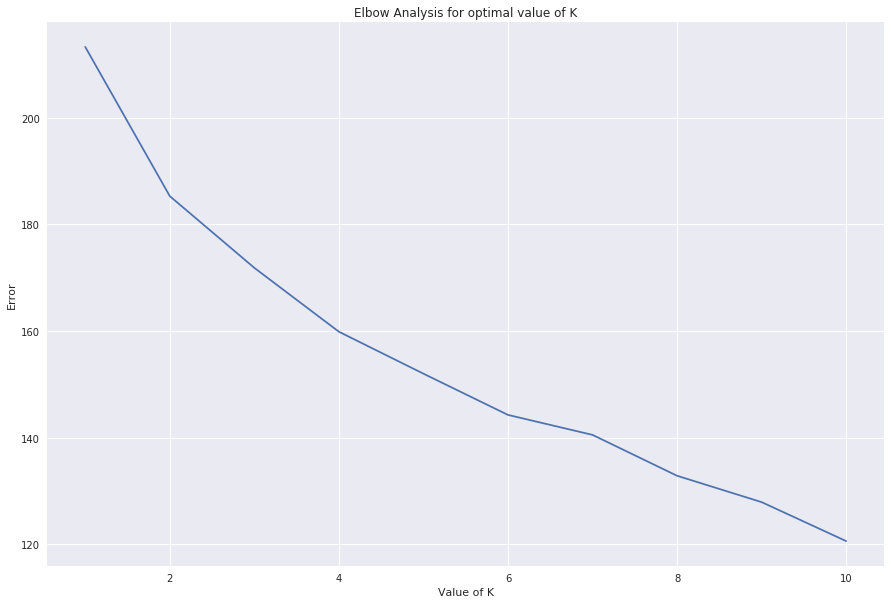

In [60]:
plt.figure(figsize=(15,10));
plt.plot(n, ss);
plt.xlabel('Value of K');
plt.ylabel('Error');
plt.title('Elbow Analysis for optimal value of K');

In [ ]:
matrics.silhouet